# Diffusion equation 1D

The 1D Diffusion equation for a condetration $c(t,x)$ reads

## $\frac{\partial c(t,x)}{\partial t}=D\frac{\partial^2c(t,x)}{\partial x^2}$

Where $D$ is the diffusion constant.

Suppose we are given an interval $[-10<x<10]$. Let us put the boundary conditions the way that we have $c(t,x=-10)=1$, the so called Dirichlet boundary contition. This modells a block of salt, e.g. touching a half space of water. The water layer has length $L=20$. At the upper end there is a solid wall, where nothing can penetrate. This is modelled by setting the gradient of $c(t,x)$ to zero, i.e. $\frac{\partial c}{\partial x}=0$.


In [1]:
from scipy.special import erf
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D   # this is for 3D plotting
import matplotlib.cm as cm

In [7]:
t=.01
x = np.linspace(-5.,5.,100)
xr = np.linspace(0,5.,100)

<IPython.core.display.Javascript object>


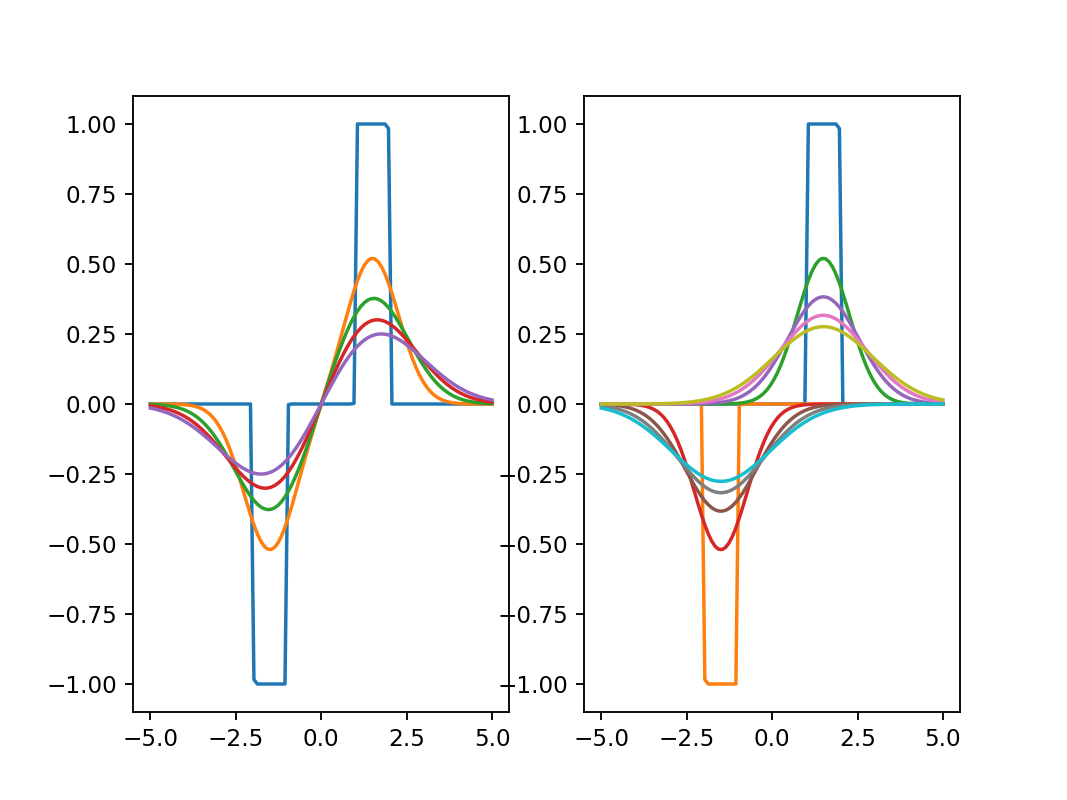

In [16]:
%matplotlib notebook
fig, (ax1, ax2) = plt.subplots(1,2)
#
for t in np.linspace(0.0001,1.,5):
    x1=(x-1.)/np.sqrt(4.*t)
    x2=(x-2.)/np.sqrt(4.*t)
    x3=(x+1.)/np.sqrt(4.*t)
    x4=(x+2.)/np.sqrt(4.*t)
    upos = -1/2*(erf(x2)-erf(x1))
    uneg = 1/2*(erf(x4)-erf(x3))
    ax1.plot(x,upos-uneg)
    ax2.plot(x,upos)
    ax2.plot(x,-uneg)

In [ ]:
x = np.linspace(0,10,100)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(x,erf(x))
ax.plot(x,np.exp(-x**2))

We need two discretizations, one for the first order derivative and one for the second order. In terms of array components the second order reads (Note: lower case indices indicate spatial discretization upper case indices indicate discretization in time):

## $\frac{\partial^2 c_i}{\partial x^2}=\frac{1}{\Delta x^2}(c_{i+1}-2c_i+c_{i-1})$

To ensure that the first order derivative is of the same order as the second one we have to apply the following three point formula for the first order derivative at the rightmost pointwith index n, $c_n$

## $\frac{\partial c_n}{\partial x}=3c_n-4c_{n-1}+c_{n-2}=0$

This is a so called Neumann boundary condition.

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
nmax = 200000
nplot = 50000
c = np.ones(100)
c[61:]=0
c[0:39]=0
# Heating or source term
h = np.ones(100)
h[56:]=0
h[0:45]=0
# Set c = 0 at t = 0
c = np.zeros(100)
#
dt = 0.1
dx = 1.0
#
plotlist = [0, 1000, 10000, 50000, 200000]
#
for n in np.arange(nmax+1):
    clinks = np.roll(c, shift = 1)
    crechts = np.roll(c, shift = -1)
    c[:-1] = c[:-1] + (clinks[:-1] -2*c[:-1]+crechts[:-1])*dt + h[:-1]*dt
    c[-1] = (4.*c[-2] - c[-3])/3.
    c[0] = 0.
    
    if n in plotlist:
        ax.plot(c, label = 't = ' + str(n))

ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
plt.show()